In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns

# Create the data generators with data augmentation


In [15]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -----                                 41.0/293.3 kB 991.0 kB/s eta 0:00:01
     -----------------                      133.1/293.3 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
train_dataset_path = r'C:\Users\Cambridge\Downloads\temp_transformed_train\train'
validation_dataset_path = r'C:\Users\Cambridge\Downloads\temp_transformed_train\test'

# Set the image size and batch size
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3193735565901608824
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22674407424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14375752042603541943
physical_device_desc: "device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:9e:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Calculate class weights
class_frequencies = train_generator.classes
total_samples = len(class_frequencies)
class_counts = tf.math.bincount(class_frequencies)
class_weights = {i: total_samples / count for i, count in enumerate(class_counts)}




Found 34869 images belonging to 20 classes.
Found 15000 images belonging to 20 classes.


In [9]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Additional Conv2D layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Additional Dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps_per_epoch = validation_generator.samples // BATCH_SIZE

# Train the model with class weights


In [10]:
num_epochs = 100
history=model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch,
    epochs=num_epochs,
    class_weight=class_weights
)

# Save the trained model



Epoch 1/100
1089/1089 [==============================] - 380s 337ms/step - loss: 55.6806 - accuracy: 0.1183 - val_loss: 2.6069 - val_accuracy: 0.1796
Epoch 2/100
1089/1089 [==============================] - 392s 360ms/step - loss: 50.9164 - accuracy: 0.2093 - val_loss: 2.4129 - val_accuracy: 0.2555
Epoch 3/100
1089/1089 [==============================] - 373s 342ms/step - loss: 47.6988 - accuracy: 0.2647 - val_loss: 2.2409 - val_accuracy: 0.3108
Epoch 4/100
1089/1089 [==============================] - 374s 343ms/step - loss: 44.0226 - accuracy: 0.3220 - val_loss: 2.2459 - val_accuracy: 0.3180
Epoch 5/100
1089/1089 [==============================] - 371s 341ms/step - loss: 41.3942 - accuracy: 0.3628 - val_loss: 1.9722 - val_accuracy: 0.3984
Epoch 6/100
1089/1089 [==============================] - 374s 344ms/step - loss: 39.5657 - accuracy: 0.3946 - val_loss: 1.8986 - val_accuracy: 0.4286
Epoch 7/100
1089/1089 [==============================] - 375s 345ms/step - loss: 37.6322 - accuracy:

In [11]:
model.save('image_classification_model_class_weights_20_class__arch.h5')

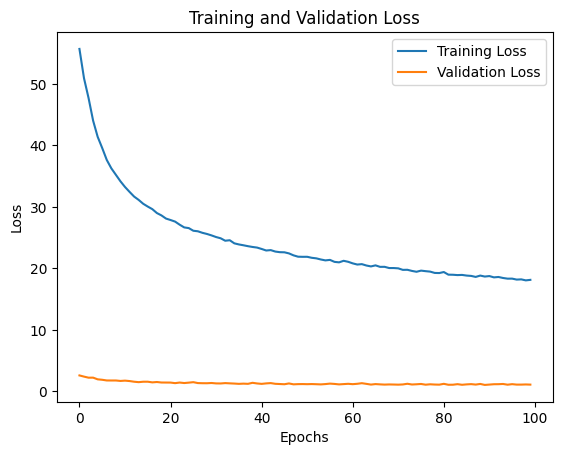

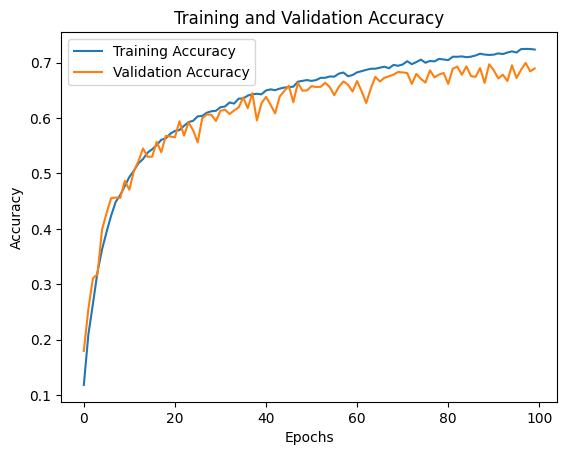

In [30]:
# Assuming you have a variable named 'history' that contains the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the loss curve
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy curve
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Found 15000 images belonging to 20 classes.
Confusion Matrix:
[[623   5   5   1   1   6   4   9   0  26   3  17   3   5   7   3   4   0
   25   3]
 [  2 548  17   4   9   7  12  18   7   2  14   3  26   1   1  19  21   8
   29   2]
 [  3  27 540   1   6   4   3  12   9   1  42   2  60   2   8   4  11   6
    5   4]
 [  3  13   0 465  13   0  49  27   4   6   9  17   2   4   8  22   7  14
   60  27]
 [  1  14   4   0 583   0   5  24   3   5   9   2  19   3   1   5  19  37
   13   3]
 [  1  14  22   0   5 568   9  16  24   3   8   0  41   2   2  14   9   4
    5   3]
 [  7  27   1  33   8   5 486  12   3   7   7  10  11   7   4  44   7  17
   49   5]
 [  5  14  24   5  16  24   5 414  65   9  40  20  31   2  15   6  35   1
    2  17]
 [  0   8  15   2  13  15   5  42 511   0  24  14  34  11  24  10   8   5
    6   3]
 [ 14  12   8   2  10  11   1   6   1 599   1  33  16   3   4   4   5   2
   13   5]
 [  4  17  28   4  12   3   5  32   4   4 500   0  40   2  17  31  23   7
    8   9]
 [ 

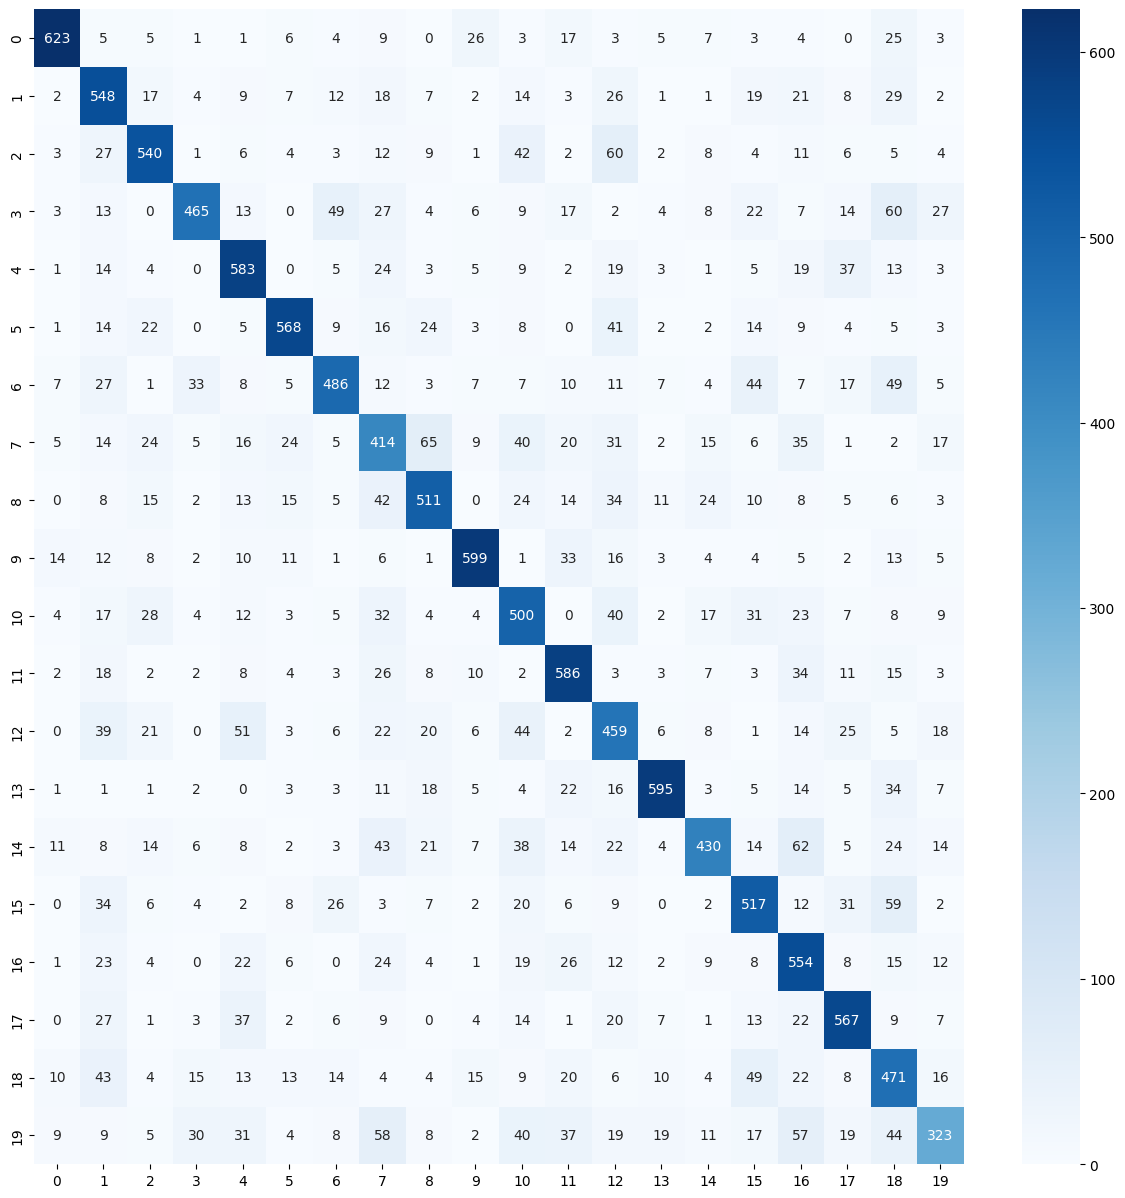

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have loaded the test dataset and model as follows:
test_dataset_path = r'C:\Users\Cambridge\Downloads\temp_transformed_train\test'
model_path = 'image_classification_model_class_weights_20_class__arch.h5'

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=1,  # Set batch size to 1 to obtain predictions for each individual sample
    class_mode='categorical',
    shuffle=False  # Do not shuffle the test data
)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the predicted labels using the trained model
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(15, 15))  # Adjust the width and height as desired

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Display the plot
plt.show()

In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
model = tf.keras.models.load_model(r"C:\Users\navin\Downloads\image_classification_model_class_weights_20_class__arch (1).h5")
import numpy as np
from tensorflow.keras.preprocessing import image
# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict the image class
def predict_image_class(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

# Example usage
image_path = r"C:\Users\navin\Downloads\steamed-momos-wontons-1957616-hero-01-1c59e22bad0347daa8f0dfe12894bc3c.jpg"  # Replace with the path to your image
predicted_class_index = predict_image_class(image_path)
class_labels = ['banana_chips','briyani', 'butter_naan','chicken_wings','chole_bhature','dhokla','fish_fry','icecream','idli','jalebi','kaathi_rolls','ladoo','masala_dosa','mendhuwada','momos','paneer_tikka','pani-puri','pav_bhaji','pokada','samosa']
predicted_class_label = class_labels[predicted_class_index]
print(predicted_class_label)

1/1 [==============================] - 0s 499ms/step
momos


In [22]:
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print the classification report
print(report)

               precision    recall  f1-score   support

 banana_chips       0.89      0.83      0.86       750
      briyani       0.61      0.73      0.66       750
  butter_naan       0.75      0.72      0.73       750
chicken_wings       0.80      0.62      0.70       750
 chole_bature       0.69      0.78      0.73       750
       dhokla       0.83      0.76      0.79       750
     fish_fry       0.74      0.65      0.69       750
     icecream       0.51      0.55      0.53       750
         idli       0.71      0.68      0.69       750
       jalebi       0.84      0.80      0.82       750
 kaathi_rolls       0.59      0.67      0.63       750
        ladoo       0.70      0.78      0.74       750
  masala_dosa       0.54      0.61      0.57       750
   mendhuwada       0.86      0.79      0.83       750
        momos       0.76      0.57      0.65       750
 paneer_tikka       0.66      0.69      0.67       750
    pani-puri       0.59      0.74      0.66       750
    pav_b

In [4]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model(r"C:\Users\navin\Downloads\image_classification_model_class_weights_20_class__arch (1).h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\navin\AppData\Local\Temp\tmplwnyp7l7\assets


INFO:tensorflow:Assets written to: C:\Users\navin\AppData\Local\Temp\tmplwnyp7l7\assets
